In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir(r"C:\Users\Pranjali\Downloads")

In [3]:
rural = gpd.read_file(r"D:\All project data\BR-CENSUS2011\rural-BR_2011.shp")

In [3]:
list(rural.columns.values)

['Unnamed_ 0',
 'DISTRICT',
 'Tothhold',
 'saljob',
 'pcsaljob',
 'govtsal',
 'pcgovtsal',
 'publicsal',
 'pcpublicsa',
 'salaryjob',
 'pcsalaryjo',
 'hholdgov',
 'incl5k',
 'pcincl5k',
 'incg10k',
 'pcincg10k',
 'unirr_area',
 'irr_area',
 'TP',
 'noworker',
 'noworkerm',
 'agriworker',
 'infants',
 'tribal',
 'literate',
 'illiterate',
 'margworker',
 'mworker',
 'geometry']

In [4]:
#SENSITIVITY INDICATORS
#1.Total population
popln = []
pindex = []
for i in range(1,38):
    popln.append(rural['TP'][i])
for i in range(37):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [5]:
#2.tribal population
scst = []
scstindex = []
for i in range(1,38):
    scst.append((rural['tribal'][i]))
for i in range(37):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [6]:
#3.infants population
infants = []
infindex = []
for i in range(1,38):
    infants.append((rural['infants'][i]))
for i in range(37):
    index = (infants[i]-min(infants))/(max(infants)-min(infants))
    infindex.append(index)

In [7]:
TPindex =[]
for i in range(37):
    TPindex.append(((scst[i]+infants[i])/popln[i])*pindex[i] + (0.5-(scst[i]/popln[i]))*scstindex[i]+ (0.5-(infants[i]/popln[i]))*infindex[i])   

In [8]:
for i in range(len(TPindex)):
    if(TPindex[i]<0):
        TPindex[i]=1

In [9]:
#4.Unirrigated area
unirra = []
unirrindex = []
for i in range(1,38):
    unirra.append((rural['unirr_area'][i]))
for i in range(37):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [10]:
#5.Non-workers
nwork = []
nworkindex = []
for i in range(1,38):
    nwork.append((rural['noworker'][i]))
for i in range(37):
    index = (nwork[i]-min(nwork))/(max(nwork)-min(nwork))
    nworkindex.append(index)

In [11]:
#6.pop.with income<5000
incl5 = []
incl5index = []
for i in range(1,38):
    incl5.append((rural['incl5k'][i]))
for i in range(37):
    index = (incl5[i]-min(incl5))/(max(incl5)-min(incl5))
    incl5index.append(index)

In [12]:
#7.illiterate
illit = []
illitindex = []
for i in range(1,38):
    illit.append((rural['illiterate'][i]))
for i in range(37):
    index = (illit[i]-min(illit))/(max(illit)-min(illit))
    illitindex.append(index)

In [13]:
#Sensitivity index
S=[0]
for i in range(37):
    S.append(0.2*(TPindex[i]+unirrindex[i]+nworkindex[i]+incl5index[i]+illitindex[i]))

In [14]:
#Adaptive capacity indicators
#1.households registered with govt.
hholdg = []
hholdgindex = []
for i in range(1,38):
    hholdg.append((rural['hholdgov'][i]))
for i in range(37):
    index = (hholdg[i]-min(hholdg))/(max(hholdg)-min(hholdg))
    hholdgindex.append(index)

In [15]:
#3.Irrigated area
irra = []
irrindex = []
for i in range(1,38):
    irra.append((rural['irr_area'][i]))
for i in range(37):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [16]:
# Agriculture workers
agworker =[]
agworkindex=[]
for i in range(1,38):
    agworker.append((rural['agriworker'][i]))
for i in range(37):
    index = (agworker[i]-min(agworker))/(max(agworker)-min(agworker))
    agworkindex.append(index)

In [17]:
agriindex=[]
for i in range(37):
    agriindex.append(0.5*(irrindex[i]+agworkindex[i]))

In [18]:
#4.pop.with income>10000
incg10 = []
incg10index = []
for i in range(1,38):
    incg10.append((rural['incg10k'][i]))
for i in range(37):
    index = (incg10[i]-min(incg10))/(max(incg10)-min(incg10))
    incg10index.append(index)

In [19]:
#5.main workers
aworker =[]
aworkindex=[]
for i in range(1,38):
    aworker.append((rural['mworker'][i]))
for i in range(37):
    index = (aworker[i]-min(aworker))/(max(aworker)-min(aworker))
    aworkindex.append(index)

In [20]:
#6.marginal workers
mworker =[]
mworkindex=[]
for i in range(1,38):
    mworker.append((rural['margworker'][i]))
for i in range(37):
    index = (mworker[i]-min(mworker))/(max(mworker)-min(mworker))
    mworkindex.append(index)

In [21]:
workindex=[]
for i in range(37):
    if(aworker[i]>=mworker[i]):
        workindex.append(0.33*0.25*((aworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(mworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    else:
        workindex.append(0.33*0.25*((mworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(aworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))

In [22]:
#7.literate
lit = []
litindex = []
for i in range(1,38):
    lit.append((rural['literate'][i]))
for i in range(37):
    index = (lit[i]-min(lit))/(max(lit)-min(lit))
    litindex.append(index)

In [23]:
A=[0]
for i in range(37):
    A.append(0.2*(hholdgindex[i]+agriindex[i]+incg10index[i]+workindex[i]+litindex[i]))

In [32]:
import pandas as pd
exposure = pd.read_excel(r"D:\All project data\2011-rlindex-BR.xlsx")
E = 0.25*(exposure['r1index']+exposure['r2index']+exposure['r3index']+exposure['r5index'])

In [33]:
E1=[0]
for i in range(len(E)):
    E1.append(E[i])

In [37]:
import pandas as pd
ex = pd.read_excel(r"D:\All project data\models-2006-2036(100to30)-rlindex-BR.xlsx")
Efut = 0.25*(ex['r1index']+ex['r2index']+ex['r3index']+ex['r5index'])

In [27]:
Efut1=[0]
for i in range(len(Efut)):
    Efut1.append(Efut[i])

In [28]:
Vfut1=[]
for i in range(len(A)):
    Vfut1.append(0.33*(Efut1[i]+S[i]-A[i]))

In [30]:
len(E1)

13

In [34]:
V=[]
for i in range(len(A)):
    V.append(0.33*(E1[i]+S[i]-A[i]))

In [35]:
rural['RL100']=exposure['rl100']
rural['RL30']=exposure['r30']
rural['return1index']=exposure['r1index']
rural['return2index']=exposure['r2index']
rural['return3index']=exposure['r3index']
rural['return5index']=exposure['r5index']
rural['Sindex']= S
rural['Aindex']= A
rural['Eindex']=E1
rural['Vindex']=V

In [38]:
rural['Vfut1']=Vfut1
rural['Efut1']=Efut1

In [ ]:
rural.to_file(driver = 'ESRI Shapefile', filename= r"C:\Users\Pranjali\Downloads\ruralBR2011.shp")

In [110]:
max(rural['Efut1'])

0.9979814630043347

In [118]:
rural1 = rural[['DISTRICT','Vindex']]
data_for_map = rural1.rename(index=str, columns={'DISTRICT':'dist','Vindex':'e'})
merged = rural.set_index('DISTRICT').join(data_for_map.set_index('dist'))

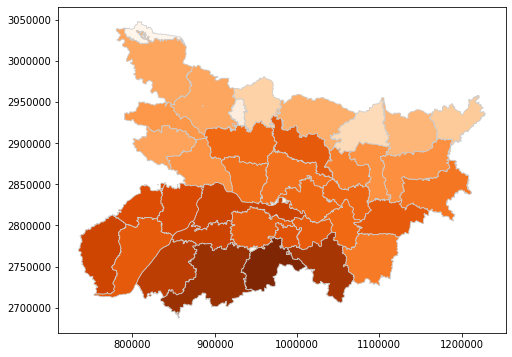

In [119]:
variable = 'Vindex'
# set the range for the choropleth

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

In [120]:
ax.axis('off')
# add a title
ax.set_title('Vulnerability in period 1981-2015', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.40))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\BR-V(100to30)-2011.png', dpi=300)

In [94]:
max(V)

0.3591165478337215